In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
print(f'X SHAPE: {X.shape}')
print(f'y SHAPE: {y.shape}')


X SHAPE: (569, 30)
y SHAPE: (569,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [8]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [9]:
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = -1/m * np.sum(y*np.log(h + 1e-8) + (1-y)*np.log(1 - h + 1e-8))
    return cost

In [10]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = (1/m) * np.dot(X.T, (h - y))
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
    return weights, cost_history

In [11]:
n_features = X_train.shape[1]
weights = np.zeros(n_features)

learning_rate = 0.01
iterations = 2000

weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

# --- 4. Evaluate Model ---
# Predictions
y_pred_prob = sigmoid(np.dot(X_test, weights))
y_pred = (y_pred_prob >= 0.5).astype(int)


In [12]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nLogistic Regression (from scratch) Evaluation:")
print("-----------------------------------------------")
print("Accuracy:", round(accuracy, 4))
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))



Logistic Regression (from scratch) Evaluation:
-----------------------------------------------
Accuracy: 0.9912

Confusion Matrix:
 [[42  1]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        43
      benign       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



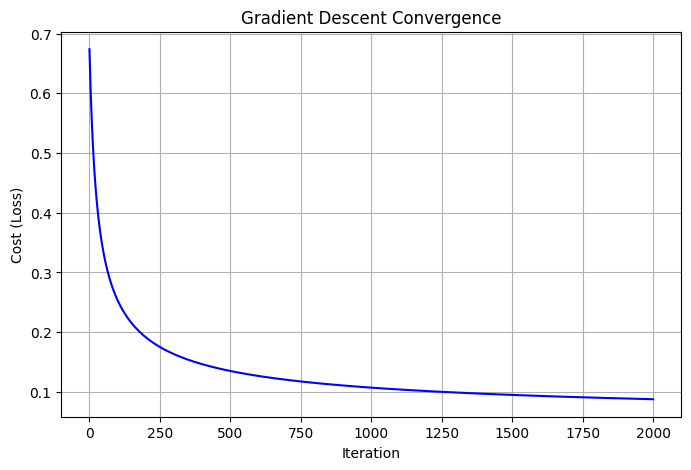

In [13]:
plt.figure(figsize=(8,5))
plt.plot(cost_history, color='blue')
plt.title("Gradient Descent Convergence")
plt.xlabel("Iteration")
plt.ylabel("Cost (Loss)")
plt.grid(True)
plt.show()

## Naive Bayes Classifier

In [14]:
from sklearn.naive_bayes import GaussianNB


In [15]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [16]:
y_pred = nb_model.predict(X_test)


In [17]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [18]:
print("\nModel Evaluation:")
print("-----------------")
print("Accuracy:", round(accuracy, 4))
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))



Model Evaluation:
-----------------
Accuracy: 0.9649

Confusion Matrix:
 [[40  3]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



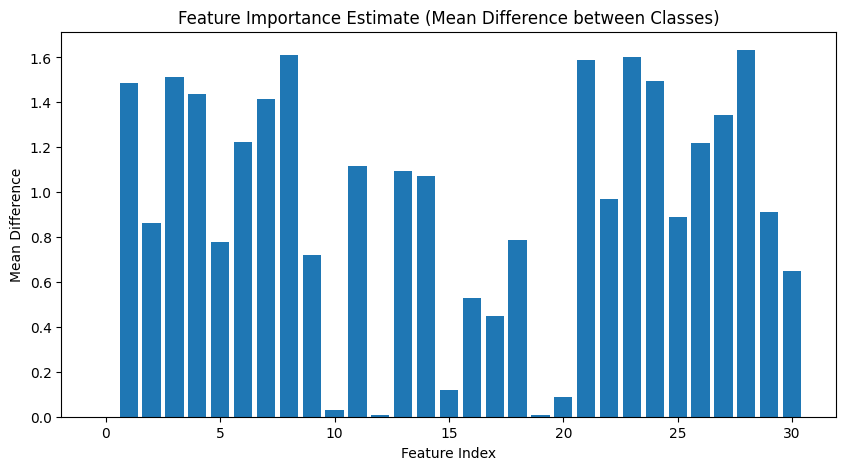

In [19]:
mean_diff = np.abs(nb_model.theta_[0] - nb_model.theta_[1])
plt.figure(figsize=(10, 5))
plt.bar(range(len(mean_diff)), mean_diff)
plt.title("Feature Importance Estimate (Mean Difference between Classes)")
plt.xlabel("Feature Index")
plt.ylabel("Mean Difference")
plt.show()

## Decision Boundary

In [20]:
X = data.data[:, :2] 
y = data.target


In [24]:
X

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]], shape=(569, 2))

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

nb = GaussianNB()
lr = LogisticRegression()

nb.fit(X, y)
lr.fit(X, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# محدوده‌ی ویژگی‌ها
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# داده‌ی شبکه برای پیش‌بینی
grid = np.c_[xx.ravel(), yy.ravel()]


In [38]:
Z_nb = nb.predict(grid)
Z_lr = lr.predict(grid)

Z_nb = Z_nb.reshape(xx.shape)
Z_lr = Z_lr.reshape(xx.shape)


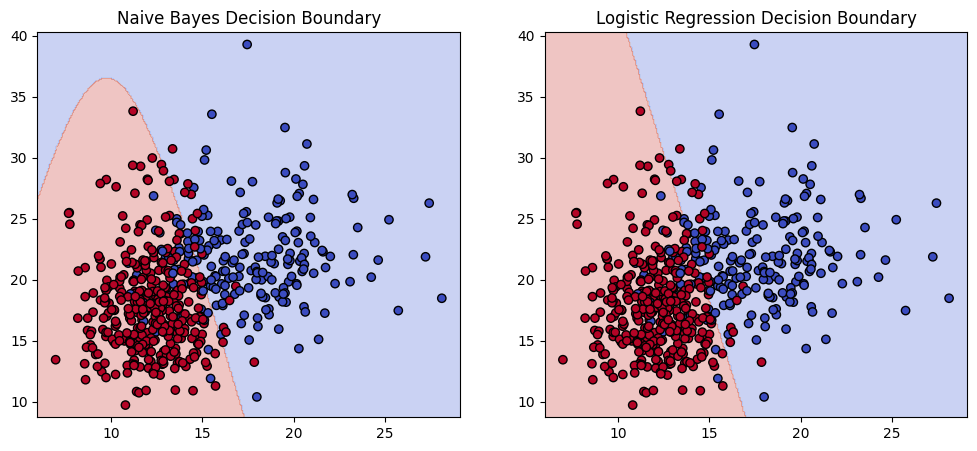

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].contourf(xx, yy, Z_nb, alpha=0.3, cmap='coolwarm')
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
axes[0].set_title("Naive Bayes Decision Boundary")

axes[1].contourf(xx, yy, Z_lr, alpha=0.3, cmap='coolwarm')
axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
axes[1].set_title("Logistic Regression Decision Boundary")

plt.show()
